In [1]:
import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DIR = 'E:/10th Semester/Computer Vision & Pattern Recognition/Dataset/CIFAR-10-images/train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [3]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append([img_arr, class_num])
print(len(TRAIN_DATA))

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:42<00:00, 117.16it/s]

50000


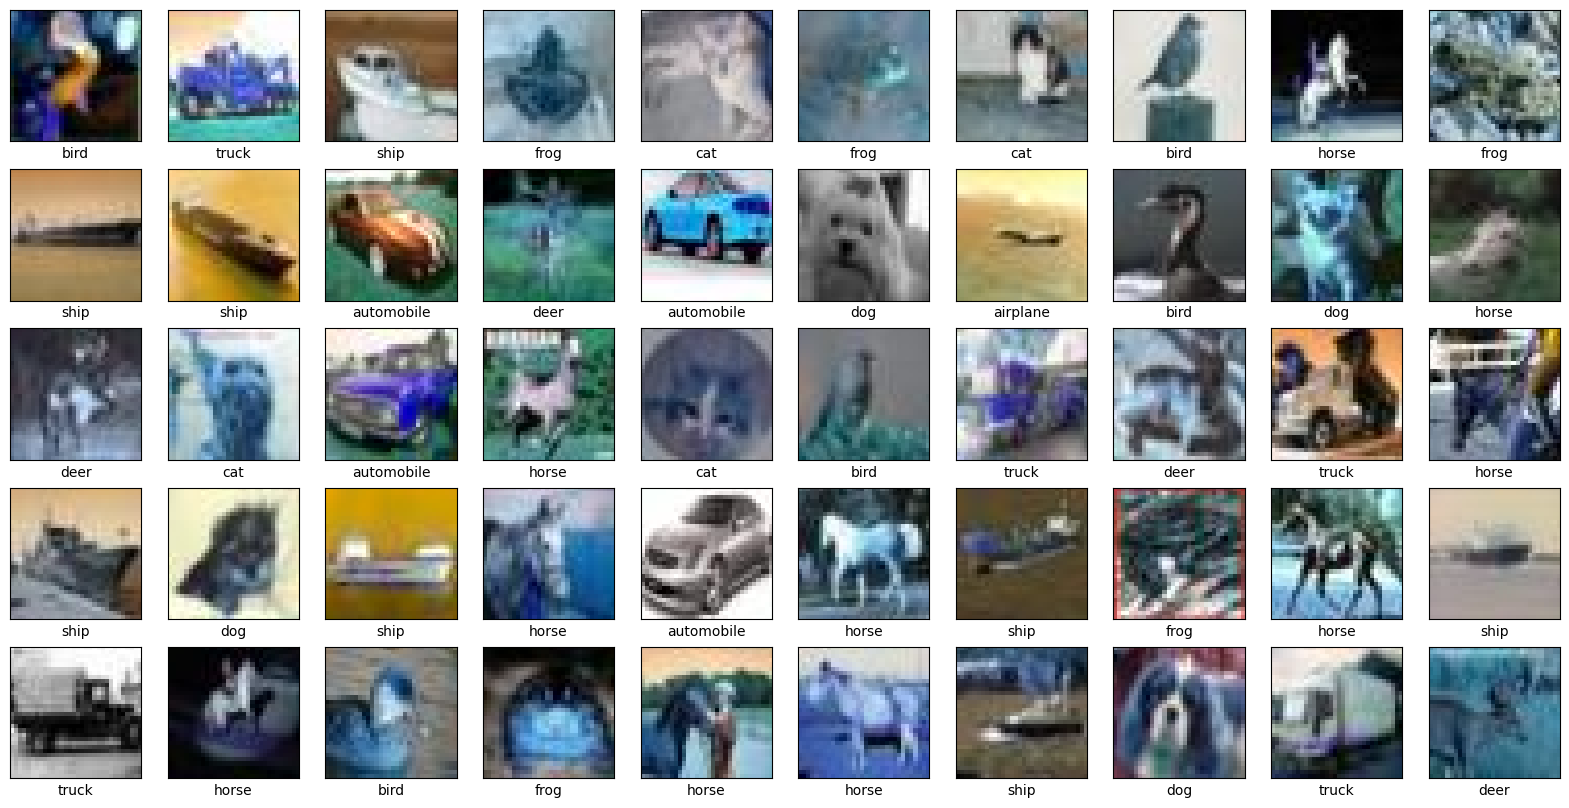

In [4]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

In [5]:
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

In [ ]:
k_values = list(range(1, 21))

# Perform 5-fold cross-validation and record scores for each k
scores = []
for k in k_values:
    fold_scores = []
    for i in range(5):
        # Set up the training and validation sets for this fold
        if i == 0:
            train = f1+f2+f3+f4
            validation = f0
        elif i == 1:
            train = f0+f2+f3+f4
            validation = f1
        elif i == 2:
            train = f1+f0+f3+f4
            validation = f2
        elif i == 3:
            train = f1+f2+f0+f4
            validation = f3
        elif i == 4:
            train = f1+f2+f3+f0
            validation = f4
            
        # Compute scores for this validation set using kNN with the current k
        fold_score = 0
        for v in validation:
            distances = []
            for t in train:
                l2_dist = np.sum(np.sqrt((t[0]-v[0])**2))
                distances.append([l2_dist, t[1]])
            distances.sort()
            neighbors = [d[1] for d in distances[:k]]
            prediction = max(set(neighbors), key=neighbors.count)
            if prediction == v[1]:
                fold_score += 1
        fold_scores.append(fold_score / len(validation))
    
    # Compute and record the average score across all folds for this k
    score = sum(fold_scores) / len(fold_scores)
    scores.append(score)

# Plot the results
plt.plot(k_values, scores)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()